## Read the dataset

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
random.seed(42)

In [4]:
df = pd.read_csv('~/Desktop/data/ab_data.csv')

df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [5]:
df.shape

(294478, 5)

In [6]:
df['user_id'].nunique()

290584

This dataset has 290,584 unique users.

In [7]:
df.query('converted == "1"')['user_id'].nunique() / df['user_id'].count()

0.1194418598333322

The proportion os users converted is 0.12%

In [8]:
df.query('(group == "treatment" and landing_page != "new_page") or (group != "treatment" and landing_page == "new_page")')['user_id'].count()

3893

The number of times 'new page' and 'treatment' don't line up is 3893 times.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
user_id         294478 non-null int64
timestamp       294478 non-null object
group           294478 non-null object
landing_page    294478 non-null object
converted       294478 non-null int64
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


None of the rows in this dataset have missing values.

In [10]:
df2 = df.drop(df.query('(group == "treatment" and landing_page != "new_page") or (group == "control" and landing_page != "old_page")').index)

Creating a new dataframe df2 which won't have any line up between 'new page' and 'treatment'

In [11]:
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

Double checking if all the rows were removed or not.

In [12]:
df2.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


In [13]:
df2['user_id'].nunique()

290584

There are 290,584 unique user id's in df2.

In [14]:
df2[df2.duplicated(['user_id'])]['user_id']

2893    773192
Name: user_id, dtype: int64

This one user id is repeated in df2.

In [15]:
df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [16]:
df2 = df2.drop(df2[(df2['user_id']==773192) & (df2['timestamp']=='2017-01-09 05:37:58.781806')].index)

df2.query('user_id == "773192"')

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


In [17]:
df2.query('converted == "1"')['user_id'].count() / df.query('converted')['user_id'].count()

0.11801560727796304

The probability of user converting regardless of the page they receive is 11.8%

In [18]:
df2.query('(group == "control" and converted == "1")')['user_id'].count() / df2.query('group == "control"')['user_id'].count()

0.1203863045004612

Probability of user converting if they are in "control" group is 12%

In [19]:
df2.query('group == "treatment" and converted == "1"')['user_id'].count() / df2.query('group == "treatment"')['user_id'].count()

0.11880806551510564

Probability of user converting if they are in "treatment" group is 11.88%

In [21]:
df.query('landing_page == "new_page"')['user_id'].count() / df['user_id'].count()

0.5

Probability of user receiving new page is 50%

## A/B Test

                                        H_0 : p_old >= p_new

                                        H_1 : p_new > p_old

In [22]:
df2.query('landing_page == "new_page"')['user_id'].count()

145310

In [23]:
df2.query('landing_page == "old_page"')['user_id'].count()

145274

In [24]:
p_new = df2.query('converted == "1"')['user_id'].count() / df2['user_id'].count()

p_new


0.11959708724499628

In [25]:
p_old = df2.query('converted == "1"')['user_id'].count() / df2['user_id'].count()

p_old

0.11959708724499628

In [26]:
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

n_new

145310

In [27]:
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()

n_old

145274

In [47]:
new_page_converted = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))

new_page_converted.mean()

0.8796091115546074

In [48]:
old_page_converted = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))

old_page_converted.mean()

0.8812795131957543

In [49]:
obs_diff = new_page_converted.mean() - old_page_converted.mean()

obs_diff

-0.0016704016411468459

The observed difference between the simulated values of converted new page and converted old page is very small.

In [50]:
p_diffs = []
for _ in range(10000):
    new_page_mean = np.random.choice([0,1], n_new, p=(p_new, 1-p_new))
    old_page_mean = np.random.choice([0,1], n_old, p=(p_old, 1-p_old))
    p_diffs.append(new_page_mean.mean() - old_page_mean.mean())

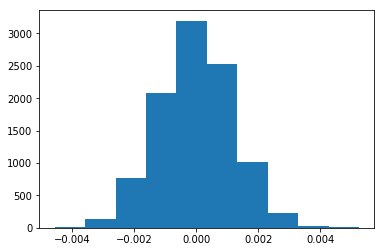

In [51]:
plt.hist(p_diffs);

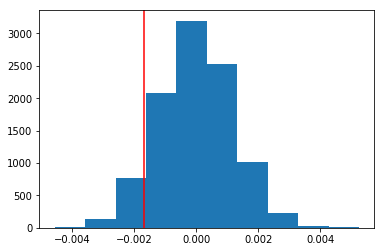

In [54]:
plt.hist(p_diffs)
plt.axvline(x=obs_diff,color='red');

In [53]:
(p_diffs>obs_diff).mean()

0.9144

The above value computed is known as the p-value which actually determines whether the we reject or fail to reject the null Hypothesis.
Here, since the p-value is 0.15 which is higher than the Type I error rate of 0.05, we fail to reject the null Hypothesis.
The new page is not better than the old page.


### Z-test

In [57]:
import statsmodels.api as sm

convert_old = df2.query('converted == "1" and landing_page == "old_page"')['user_id'].nunique()
convert_new = df2.query('converted == "1" and landing_page == "new_page"')['user_id'].nunique()
n_old = df2.query('landing_page == "old_page"')['user_id'].nunique()
n_new = df2.query('landing_page == "new_page"')['user_id'].nunique()

print(convert_old)
print(convert_new)
print(n_old)
print(n_new)

17489
17264
145274
145310


In [58]:
ztest_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative="larger")

ztest_score, p_value

(1.3109241984234394, 0.09494168724097551)

Since we are considering alpha value of 0.05, the critical value is 1.96. Therefore, our decision rule for this one tailed test is if Z is less than -1.96 or greater than 1.96 we reject the Null Hypothesis.

Also, the p-value is 0.09 which is higher than the alpha or Type I error rate

From the above calculation, the Z score is 1.31 which is less than 1.96 and the p-value is higher than the slpha value.
Therefore, we fail to reject the Null Hypothesis that the conversion rate of the new page is better than the old page.
The conversion rate of old page and new page have no difference.
Yes, it does agree with the findings in above parts.

## Logistic Regression

In [60]:
df2['intercept'] = 1

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1


In [61]:
df2[['old_page', 'new_page']] = pd.get_dummies(df2['landing_page'])

df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']

df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,old_page,new_page,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,1,0


Creating dummy variables for categorical features.

In [62]:
model = sm.Logit(df2['converted'], df2[['intercept', 'ab_page']])
results = model.fit()

results.summary()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Tue, 23 Jul 2019   Pseudo R-squ.:               8.077e-06
Time:                        10:28:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

In [63]:
1/np.exp(-1.9888), 1/np.exp(-0.0150)

(7.3067603868728614, 1.015113064615719)

**Logistic Regression**

The p-value associated with ab_page is 0.190

Now testing to see if any other factors like the city user lives in will affect the Regression results or not.

Merging the countries dataset to create a new one

In [68]:
countries_df = pd.read_csv('~/Desktop/data/countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,new_page,ab_page
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1


In [69]:
df_new[['UK', 'US', 'CA']] = pd.get_dummies(df_new['country'])

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,new_page,ab_page,UK,US,CA
user_id,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0


Creating dummy variables for categorical features.

In [70]:
model2 = sm.Logit(df_new['converted'], df_new[['intercept', 'US', 'UK', 'new_page']])
results2 = model2.fit()
results2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Tue, 23 Jul 2019   Pseudo R-squ.:               2.323e-05
Time:                        10:56:27   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0042      0.009   -224.560      0.000      -2.022      -1.987
US             0.0099      0.013      0.743      0.457      -0.016       0.036
UK            -0.0408      0.027     -1.516      0.130      -0.093       0.012
new_page       0.0149      0.011      1.307      0.191      -0.007       0.037
==============================================================================
"""

In [71]:
np.exp(0.0099), 1/np.exp(-0.0408), np.exp(0.0149)

(1.0099491671175422, 1.0416437559600236, 1.0150115583846535)

The conclusions based on the summary of the above model are:

For each unit increase in new page, conversion will happen 1.01 times as likely holding all the other variables constant.

For each unit increase in US, conversion will happen 0.96 times as likely holding all the other variables constant.

For each unit decrease in UK, conversion will happen 1.04 times as likely holding all other variables constant.

### Adding Higher Order terms

Adding Higher Order terms to check if the interaction between page and country has any effect on conversion.

In [73]:
df_new['UK_new_page'] = df_new['UK'] * df_new['new_page']
df_new['US_new_page'] = df_new['US'] * df_new['new_page']

df_new.head()

,country,timestamp,group,landing_page,converted,intercept,old_page,new_page,ab_page,UK,US,CA,UK_new_page,US_new_page
user_id,,,,,,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0,0,1,0,0,1
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1,0,0,1,0,0
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,0,1,0,1,0,0,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0,0,1,0,0,1
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,0,1,0,1,0,0,0


In [74]:
model3 = sm.Logit(df_new['converted'], df_new[['intercept', 'new_page', 'US', 'UK', 'UK_new_page', 'US_new_page']])
results3 = model3.fit()
results3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Tue, 23 Jul 2019   Pseudo R-squ.:               3.482e-05
Time:                        11:03:17   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
intercept      -2.0070      0.010   -207.045      0.000      -2.026      -1.988
new_page        0.0206      0.014      1.505      0.132      -0.006       0.047
US              0.0257      0.019      1.363      0.173      -0.011       0.063
UK             -0.0644      0.038     -1.679      0.093      -0.140       0.011
UK_new_page     0.0469      0.054      0.872      0.383      -0.059       0.152
US_new_page    -0.0314      0.027     -1.181      0.238      -0.084       0.021
===============================================================================
"""

In [75]:
np.exp(0.0206), np.exp(0.0257), 1/np.exp(-0.0644), np.exp(0.0469), 1/np.exp(-0.0314)

(1.020813644503746,
 1.0260330923696246,
 1.0665189210197745,
 1.048017202119183,
 1.0318981806179213)

The conclusions based on the summary of the above model are:
    
From the above results, the coefficient of interaction variables "UK_new_page" and "US_new_page" are different from coefficient of new page. 

p-value of intercept is statistically significant since is it less than 0.05 as compared to all other parameters.

Therefore, the country user lives in is not significant in the conversion considering which page user gets.

For each unit increase in US, conversion will happen 1.02 times as likely holding all the other variables constant.

For each unit decrease in UK, conversion will happen 1.06 times as likely holding all the other variables constant.

Conversion is 1.04 times as likely for every unit increase in US & new page users than CA & new page users, holding all other variables constant.

Conversion is 1.04 times as likely for every unit increase in UK & new page users than CA & new page users, holding all other variables constant.

Conversion is 1.03 times as likely for every unit decrease in US & new page users than CA & new page users, holding all other variables constant.